# Hist 3368 Week 6 Research Co-located Words and Graph Them Over Time

A 'collocate' in textual research is a word that is co-located with another word: that is, the two words occur in the same phrase, sentence, speech, or debate.

Analysts study collocates in order to make sense of the changing discourse around certain vocabulary.

This notebook is about giving you the skills to inspect the words that make up the collocates for a certain keyword, and to track their co-occurrence over time.  

This notebook gives basic code sufficient to start a research project -- but insufficient to constitute a research project.  A researcher using this code would typically iterate through this code with many different combinations of words and their collocates in order to understand how a group of words hangs together.

## Load Data

In [1]:
import datetime
import pandas as pd
import numpy as np
import csv
import glob

The following lines load some data from Congress. Don't worry too much about the commands within this block; we're more interested in the transformations we'll apply to the data after it's loaded.  If you're curious, the lines below download two separate dataframes --  "speeches" and "descriptions" -- and then merge them  so that we now have one database of speeches with the date on which they were spoken.

In [2]:
all_speech_files = glob.glob('/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_*.txt')
CONGRESS_MIN_THRESHOLD = 90
CONGRESS_MAX_THRESHOLD = 115

speech_files = []

for fn in all_speech_files:
    number = int(fn.rsplit('_', 1)[-1].split('.')[0])
    if CONGRESS_MIN_THRESHOLD <= number <= CONGRESS_MAX_THRESHOLD:
        speech_files.append(fn)

speech_files.sort()
        
def parse_one(fn):
    print(f'Reading {fn}...')
    return pd.read_csv(fn, sep='|', encoding="ISO-8859-1", error_bad_lines=False, warn_bad_lines=False, quoting=csv.QUOTE_NONE)

speeches_df = pd.concat((parse_one(fn) for fn in speech_files))
speeches_df.dropna(how='any', inplace=True)

all_description_files = glob.glob('/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_*.txt')
                                  
description_files = []

for fn in all_description_files:
    number = int(fn.rsplit('_', 1)[-1].split('.')[0])
    if CONGRESS_MIN_THRESHOLD <= number <= CONGRESS_MAX_THRESHOLD:
        description_files.append(fn)
        description_files.sort()
        
description_df = pd.concat((parse_one(fn) for fn in description_files))

all_data = pd.merge(speeches_df, description_df, on = 'speech_id')
all_data.fillna(0, inplace=True)


Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_090.txt...
Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_091.txt...
Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_092.txt...
Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_093.txt...
Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_094.txt...
Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_095.txt...
Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_096.txt...
Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_097.txt...
Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_098.txt...
Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_099.txt...
Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_100.txt...
Reading /s

In [5]:
all_data = all_data.drop(['chamber', 'speech_id', 'number_within_file', 'first_name'], 1)
all_data = all_data.drop(['last_name', 'state', 'gender', 'line_start', 'line_end', 'file', 'char_count'], 1)

KeyError: "['chamber' 'speech_id' 'number_within_file' 'first_name'] not found in axis"

The data we are looking at is different from the lists of words we worked with previously. This is tabular data -- data with columns, each of which has its own name.  However, all of the commands we've used to work with data before will work.

The **.head()** command is useful for calling up the first few lines of a dataframe so that you can inspect it. 

In [6]:
all_data['date']=pd.to_datetime(all_data['date'],format='%Y%m%d')
all_data['year'] = pd.to_datetime(all_data['date']).dt.year
all_data['month']= pd.to_datetime(all_data['date']).dt.month
all_data['month_year'] = pd.to_datetime(all_data['date']).dt.to_period('M')
all_data['month_year'] =all_data.month_year.values.astype('datetime64[M]')

In [7]:
all_data.head()

,speech,date,speaker,word_count,year,month,month_year
0,Those who do not enjoy the privilege of the fl...,1967-01-10,The VICE PRESIDENT,16,1967,1,1967-01-01
1,Mr. President. on the basis of an agreement re...,1967-01-10,Mr. MANSFIELD,35,1967,1,1967-01-01
2,The Members of the Senate have heard the remar...,1967-01-10,The VICE PRESIDENT,40,1967,1,1967-01-01
3,The Chair lays before the Senate the following...,1967-01-10,The VICE PRESIDENT,151,1967,1,1967-01-01
4,Secretary of State.,1967-01-10,Mrs. AGNES BAGGETT,3,1967,1,1967-01-01


## Research in Hansard

### Look for word1

Let's talk about how to dive deeper into research.

First, define the word or phrase that you want to look for.

In [10]:
word1 = "slave"

We learned that we can use **str.count()** to count the individual occurrences of a word per speech. str.count() takes one object, the word you're looking for. We're looking for *word1*, which is a variable containing the word 'malpractice.'

We can also use **.sort_values()** to tell pandas to sort the data by the values in one column.  .sort_values() takes the arguments "by" (where you tell it which column to use, using quotation marks, and "ascending," which can be True or False, depending on how you want your values arranged.

In [11]:
all_data['keywordcount'] = all_data['speech'].str.count(word1)
all_data.sort_values(by = 'keywordcount', ascending = False)[:3]

,speech,date,speaker,word_count,year,month,month_year,keywordcount
4379650,Mr. Speaker. all of the members of the Congres...,1995-02-28,Mr. OWENS,7819,1995,2,1995-02-01,104
5826199,Mr. Speaker. as a member of the Abraham Lincol...,2009-02-12,Mr. JACKSON of Illinois,5480,2009,2,2009-02-01,89
4844258,Madam Speaker. I would like to address a numbe...,1999-03-16,Mr. OWENS,8399,1999,3,1999-03-01,81


How many times was word1 used in each time period?

In [12]:
all_data['speech'].str.count(word1).sum()

21304

In [13]:
year1 = all_data[all_data['year'] == 1968]
year2 = all_data[all_data['year'] == 1990]

In [15]:
year1['speech'].str.count(word1).sum()

429

In [16]:
year2['speech'].str.count(word1).sum()

415

What does the difference mean? 

Let's find all the speeches in Hansard that mention word1 and count word1 by year.

In [18]:
word1_speeches = all_data[all_data["speech"].str.lower().str.contains(word1)]
word1_speeches['count'] = word1_speeches['speech'].str.lower().str.count(word1)
word1_over_time = word1_speeches.groupby(['year'])['count'].sum().sort_values(ascending = False)
word1_over_time

/hpc/applications/anaconda/3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


year
2007    1466
2009     999
1967     956
1997     930
2000     889
2001     834
1995     823
2005     822
1998     728
2003     717
2008     680
1983     640
1999     588
1996     529
1971     516
2006     470
2004     467
1968     463
1991     448
1993     436
1990     432
1970     426
1969     425
2002     422
1986     401
1984     398
1994     396
1988     384
1985     384
1992     359
2010     359
1987     340
1973     324
1972     322
1982     313
1981     309
1989     296
1974     285
1977     281
1978     258
1975     257
1976     232
1980     226
1979     225
Name: count, dtype: int64

<Figure size 432x288 with 0 Axes>

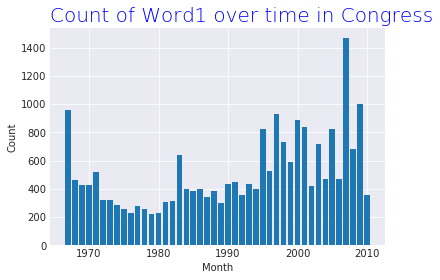

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import random


%matplotlib inline

plt.style.use('seaborn-darkgrid') # this gives us a grid with a dark background.  you can play with this to change the style.

plt.bar(word1_over_time.index, word1_over_time)

plt.title("Count of Word1 over time in Congress", loc='left', fontsize=20, fontweight=5, color='Blue')
plt.xlabel("Month")
plt.ylabel("Count")
plt.figure()



### Get the context for word1

To get the context for word1, you must call up the full text for the speeches where the keyword appears.

Next, we can count the words that commonly appear around word1.

Using .str.count(word1) and .nlargest(n) give you a list of the rownumbers for the n speeches where word1 appears the most frequently.  The rownumbers are stored in the .index for the resulting series. We save the results as the variables *word1_speechnumbers*

We can use .loc() and the rownumbers to call up the full text of the speeches that correspond to word1_speechnumbers.  We will save the results as *word1_context.*

We then clean the data using stopwording, lowercasing, and punctuation stripping.

We then count the words that result using commands for breaking the string into words, giving each word a separate row, dropping empty rows, and counting the results:

    str.split().explode().dropna().value_counts()
    
    

In [20]:
import nltk
from nltk.corpus import stopwords

In [21]:
stop = set(stopwords.words('english'))

In [23]:
stopwords_regex = r'\b(?:{})\b'.format('|'.join(stop))

In [24]:
# get the rownumbers of the n speeches that use word1 the most
year1_speechnumbers = year1['speech'].str.count(word1).nlargest(10) 
year2_speechnumbers = year2['speech'].str.count(word1).nlargest(10) 

# get the speeches that mentioned word1 the most
year1_context = year1.loc[list(year1_speechnumbers.index)]
year2_context = year2.loc[list(year2_speechnumbers.index)]
                                
# clean up the data
year1_context['cleanspeech'] = year1_context['speech'].str.replace('[^\w\s]','').str.lower() # remove punctuation, lowercase
year1_context['stopworded'] = year1_context['cleanspeech'].str.replace(stopwords_regex, '') #stopwording

year2_context['cleanspeech'] = year2_context['speech'].str.replace('[^\w\s]','').str.lower() # remove punctuation, lowercase
year2_context['stopworded'] = year2_context['cleanspeech'].str.replace(stopwords_regex, '') #stopwording

In [25]:
# count the other words that appear in the context of word1 in 1967
year1_context_count = year1_context["stopworded"].str.split().explode().dropna().value_counts()
year1_context_count[:20]

united        59
war           50
nations       48
negro         43
states        43
world         40
illinois      36
people        34
slavery       33
state         32
american      31
many          29
rights        28
first         27
history       26
convention    25
human         25
us            25
negroes       24
great         23
Name: stopworded, dtype: int64

In [26]:
# count the other words that appear in the context of word1 in 1967
year2_context_count = year2_context["stopworded"].str.split().explode().dropna().value_counts()
year2_context_count[:20]

people      58
bill        39
black       38
country     37
would       35
time        30
one         29
slave       29
tubman      29
rights      28
history     27
mr          26
american    23
civil       23
many        23
us          23
slavery     22
speaker     22
harriet     22
freedom     21
Name: stopworded, dtype: int64

### Inspect the data for word1 at different moments in time.

How many times was word1 was used in individual speeches in particular months? We just counted.  Let's call up the results and look.

Note that in the table below there are two columns: a left-hand column which is an "index;" those are just the finding-aid numbers of the speeches.  A right-hand column gives the number of times word1 appears in that speech. 

In [27]:
year1_speechnumbers

229851    13
218660    10
219179     7
286156     7
211047     6
185615     5
197406     5
186026     4
197305     4
229431     4
Name: speech, dtype: int64

Look at the speech that mentions word1 the most -- the speech listed on the top.  Find its index number in the left-hand column. 

We can look up information about that speech -- for instance the speaker and the text of the speech -- using its index number.  

Who gave the speech?

In [28]:
year1_context['speaker'][229851][:1000]

'Mr. MICHEL'

When did he give the speech?

In [37]:
year1_context['date'][229851]

Timestamp('1968-04-11 00:00:00')

What did the speech say?

In [30]:
year1_context['speech'][229851][:1000]

'Mr. Speaker. this year marks the sesquicentennial celebration for my beloved home State of Illinois. and while the act of statehood was signed on December 3. 1818. by President Monroe. I am prompted to make these remarks today because of the very strong likelihood that Congress will not be in session this December. President Monroe signed the enabling act. giving Illinois permission to become a State. on April 18. 1818. and since that is 1 week from today my remarks are quite appropriate and timely even though we will be in the midst of our Easter recess on April 18. The history of the State of Illinois mirrors the very history of the United States itself. Created out of the wilderness 150 years ago. Illinois ha6 been expanded. modified. developed. and perfected to the point of its present magnificent stature and she stands today as the pride of the Midwest. glorying in the strength of her resources and the force of her accomplishments. This year the people of Illinois will celebrate 

I've cut the quote short.  You can see the whole speech for yourself by deleting the [:1000] at the end of the line of code.


#### The importance of keeping going

Keep going until you understand! You'll want to quote the evidence you gather.  Note that these speeches are selected at random from the list of speechnumbers that appear in the dataset.


In [31]:
year1_context['speech'][218660]

'Mr. Speaker. the curse of aristocracy has plagued mankind from the beginning of civilization to the present day. The basic outrage of entrenched wealth. of perpetual ascendency of certain families. cults. or races. of gross favoritism. of unfair economic advantageall are detrimental to the welfare of mankind. all provide a basis for hatred. popular unrest. and revolution. And of all aspects of the aristocratic way of life. none exceeds in awfulness the slavery institution. rendering one man the servant of another from birth to death. It is the ultimate indignity. As a free people. exulting in the joy of democratic living. Americans have good reason. then. to sing the praise of every liberation movement responsible for erasing slavery from existence In any quarter of the world. Last Friday. March 22. marked the anniversary of the emancipation of the slaves in Puerto Rico. some 96 years ago. All Americans of good will and with knowledge of the past rejoice. on this occasion. in company 

Use command-F or EDIT > FIND in the menu above to search for word1 in your screen until you see the context.  


### Inspect the data for word1 in August

Let's look at word1 in another period

In [33]:
year2_speechnumbers

3744870    11
3763665    11
3852548    10
3746371     9
3748549     8
3746389     7
3749643     7
3794596     6
3831046     6
3746358     5
Name: speech, dtype: int64

Let's look at the top speech.  Who gave the speech?.

In [34]:
year2_context['speaker'][3744870]

'Mr. BIDEN'

When did he give the speech?

In [38]:
year2_context['date'][3744870]

Timestamp('1990-02-20 00:00:00')

What did the speech say?

In [39]:
year2_context['speech'][3744870]

'Mr. President. as the bells of freedom toll around the globe. it seems appropriate to honor one of Americas noble freedom fighters. And so today. in recognition of the memory and continuing legacy of a true founder of American freedom. I am introducing a resolution to designate March 10. 1990. as "Harriet Tubman Day." Harriet Tubman was born on the eastern shore of Maryland around 1820 and escaped from slavery in 1849. Her freedom. however. was not the beginning of her fight. Even as a child slave. she battled against slavery and injustice. One day. she was ordered by an overseer to help him tie up another slave who was to be beaten. She defied that order and allowed the fellow slave to escape. But in the process. Harriet Tubman paid a high price for her defiance and her convictions. She was Inflicted with a wound so severe that it would cause health problems for the rest of her life. The beating was not the first. nor would it be the last. But despite that cruel scar and despite the 

## Implementing KeyWords in Context (KWIC)

For this last exercise we will find keywords in context (KWIC). You can think of KWIC's output like the lines of a concordance, where you look up a passage and find the context.  We saw in the reading that historian Luke Blaxill used KWIC to make arguments about how different words were used in British election speeches.

KWIC is not the only view you need to understand the context of speeches, but it is a useful one.

To produce this output, we will split the text into n-grams where "n" stands for any number. For example, a text split into single words (like our data frame in the previous example) is split into 1-grams (also just called "tokens"). 3-grams split the text into units that are 3 words long. 5-grams split the text into units that are 5 words long. 

Now let's write a function that returns our keyword in context. You don't need to follow the code, but you should know that you can always use the function below when you want to generate a KWIC view.

In [41]:

keyword_df_year1 = year1[year1['speech'].str.contains(word1)].copy() # search the text for the presence of our keyword 

def KWIC(body):
    n = 5 # specify the number of surrounding words to use before and after the keyword
    
    words = body.split() # split the words into tokens
    keyword_index = 0
    
    # The following for loop iterates through each word in the text. If our keyword is found, the for loop stores its index. 
    # But, why are we storing the index? As you might remember, the index is a numerical representation of the row's position.
    # It can also be thought of as a unique name the computer uses to identify a row. We can call the index to return JUST these rows.
    for index, word in enumerate(words): 
        if word1 in word: 
            keyword_index = index
            break
    
    before_keyword = words[max(0, keyword_index - n):keyword_index] # store the words that come before the keyword, up to our specified number 
    after_keyword = words[keyword_index:keyword_index + n] # store the words that come after the keyword, up to our specified number 
    return ' '.join(before_keyword + after_keyword) # return the keyword in its context

keyword_df_year1['context'] = keyword_df_year1['speech'].apply(KWIC)

In [42]:
keyword_df_year1[['context']]

,context
185412,the world [disregarding the racist slavestate ...
185615,the Abolition of Slavery. The slavery conventi...
185748,to stop the sale of slavery for the young. I
186026,the Senate with petitions against slavery. The...
186048,by masters and supported by slaves is the same...
...,...
332615,people of the world are enslaved under communi...
332843,world. The World halffree and halfslave cannot...
333390,ago Mr. Charlie was the slave owner. Now I cant
333391,Any slave owner.


This data frame is a little difficult to look at, so I am going to export the contents to a file.  You can find this file in the left-hand sidebar of Jupyter and open it on your home computer to inspect later via an application such as excel.

In [43]:
keyword_df_year1.to_csv('KWIC_example_keyword_year1.csv', sep = ' ', index=False, header = True)

Can you make a KWIC table for 1880?

## Looking for collocates over time

Here is a chunk of code for preparing the software packages, data, controlled vocabulary, and stopwords. 

***Please remember that loading data takes a few minutes. Be patient. If you're running this after having run the previous blocks in the notebook, you can skip this section. ***

Let's look for how frequently word1 was used in the context of other words

In [44]:
year1_context_count[:30]

united        59
war           50
nations       48
negro         43
states        43
world         40
illinois      36
people        34
slavery       33
state         32
american      31
many          29
rights        28
first         27
history       26
convention    25
human         25
us            25
negroes       24
great         23
puerto        23
one           22
freedom       22
today         21
senate        20
men           20
time          20
years         18
served        17
nation        16
Name: stopworded, dtype: int64

In [45]:
year2_context_count[:30]

people            58
bill              39
black             38
country           37
would             35
time              30
one               29
slave             29
tubman            29
rights            28
history           27
mr                26
american          23
civil             23
many              23
us                23
slavery           22
speaker           22
harriet           22
freedom           21
slaves            21
congress          21
president         21
years             19
discrimination    18
long              17
free              17
made              16
textile           16
new               16
Name: stopworded, dtype: int64

Some of these words are more interesting than others. Let's make a set of words to investigate further.  Note that we use the singular form of all words, because we will be lemmatizing our text later on.

In [46]:
vocab = ['textile', "harriet", 'country', 'rights', 'puerto']
import re 
vocabpattern = r"(?=\b("+'|'.join(vocab)+r")\b)"  
vocabpattern

'(?=\\b(textile|harriet|country|rights|puerto)\\b)'

In [47]:
import datetime
import pandas as pd
import numpy as np
import csv
import glob
import re
import nltk
from nltk.corpus import wordnet as wn
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker 

Let's find all the speeches in Hansard that mention word1.

In [68]:
word1_data = all_data[all_data["speech"].str.contains(word1)]

In [69]:
word1_data[:3]

,speech,date,speaker,word_count,year,month,month_year,keywordcount
1016,Mr. President. I ap- PLEDGE TO PLEAD DAILY FOR...,1967-01-11,Mr. PROUTY,485,1967,1,1967-01-01,1
1252,Mr. President. on November 11 of last year. it...,1967-01-12,Mr. HRUSKA,1307,1967,1,1967-01-01,2
1697,Mr. President. today I continue my daily effor...,1967-01-16,Mr. PROXMIRE,394,1967,1,1967-01-01,1


Here is a chunk of code for cleaning the text.

***Please note that the line .apply(lemmatizetext) is time consuming.  This code may take some time to run. If you're running this after having run the previous blocks in the notebook, you can skip this section. ******

In [71]:
###### Cleaning
pd.options.mode.chained_assignment = None  # default='warn'
word1_data['speech'] = word1_data['speech'].str.replace('[^\w\s]','') # strip punctuation
word1_data['speech'] = word1_data['speech'].str.lower() # lowercase
word1_data['speech'] = word1_data['speech'].str.split() # split into words

In [72]:
word1_data[:3]

,speech,date,speaker,word_count,year,month,month_year,keywordcount
1016,"[mr, president, i, ap, pledge, to, plead, dail...",1967-01-11,Mr. PROUTY,485.0,1967.0,1.0,1967-01-01,1.0
1252,"[mr, president, on, november, 11, of, last, ye...",1967-01-12,Mr. HRUSKA,1307.0,1967.0,1.0,1967-01-01,2.0
1697,"[mr, president, today, i, continue, my, daily,...",1967-01-16,Mr. PROXMIRE,394.0,1967.0,1.0,1967-01-01,1.0


In [73]:
#Lemmatizing
word1_data['lemmas'] = [[wn.morphy(word) for word in row] for row in word1_data['speech']] # lemmatize each word in each row of the column 'lemmas'
word1_data['lemmas'] = [[word for word in row if word is not None] for row in word1_data['lemmas']] # if no lemma found, skip it.
word1_data['lemmas'] = [' '.join(row) for row in word1_data['lemmas']] # glue the individual list of lemmas back into one string per speech

TypeError: 'float' object is not iterable

In [ ]:
word1_data[:3]

Now let's find our vocabulary in the subset of speeches that include word1.

In [ ]:
word1_data["vocab"] = word1_data["lemmas"].str.findall(vocabpattern)

In [ ]:
vocabspeeches = word1_data[word1_data.astype(str)['vocab'] != '[]']
vocabspeeches = vocabspeeches.explode('vocab')
vocabspeeches[:3]

In [ ]:
vocabspeeches2 = vocabspeeches[['year', 'vocab']]
vocab_per_year = vocabspeeches2.groupby(['year', 'vocab'])['vocab'].count()
vocab_per_year = pd.DataFrame(vocab_per_year) # convert from Series to DataFrame
vocab_per_year.columns = ['count'] # label the one column "count"
vocab_per_year = vocab_per_year.reset_index() # turn the multi-index into columns 'year' and 'vocab'
vocab_per_year[:5]

## Visualize the vocab words over time



In the visualization that follows, we're going to create a scatter-plot of dots, where one dot shows how many times a word appears per month_year. We'll color the dots a different color for each word. Notice the plt.scatter() command, which tells matplotlib to use a scatterplot.

Creating complex plots of this kind sometimes involves writing a for loop where we're essentially layering a new plot for each word and changing the color each time. See if you can understand the for loop to add new colors for each individual word -- that's essentially the only new thing about this graph.


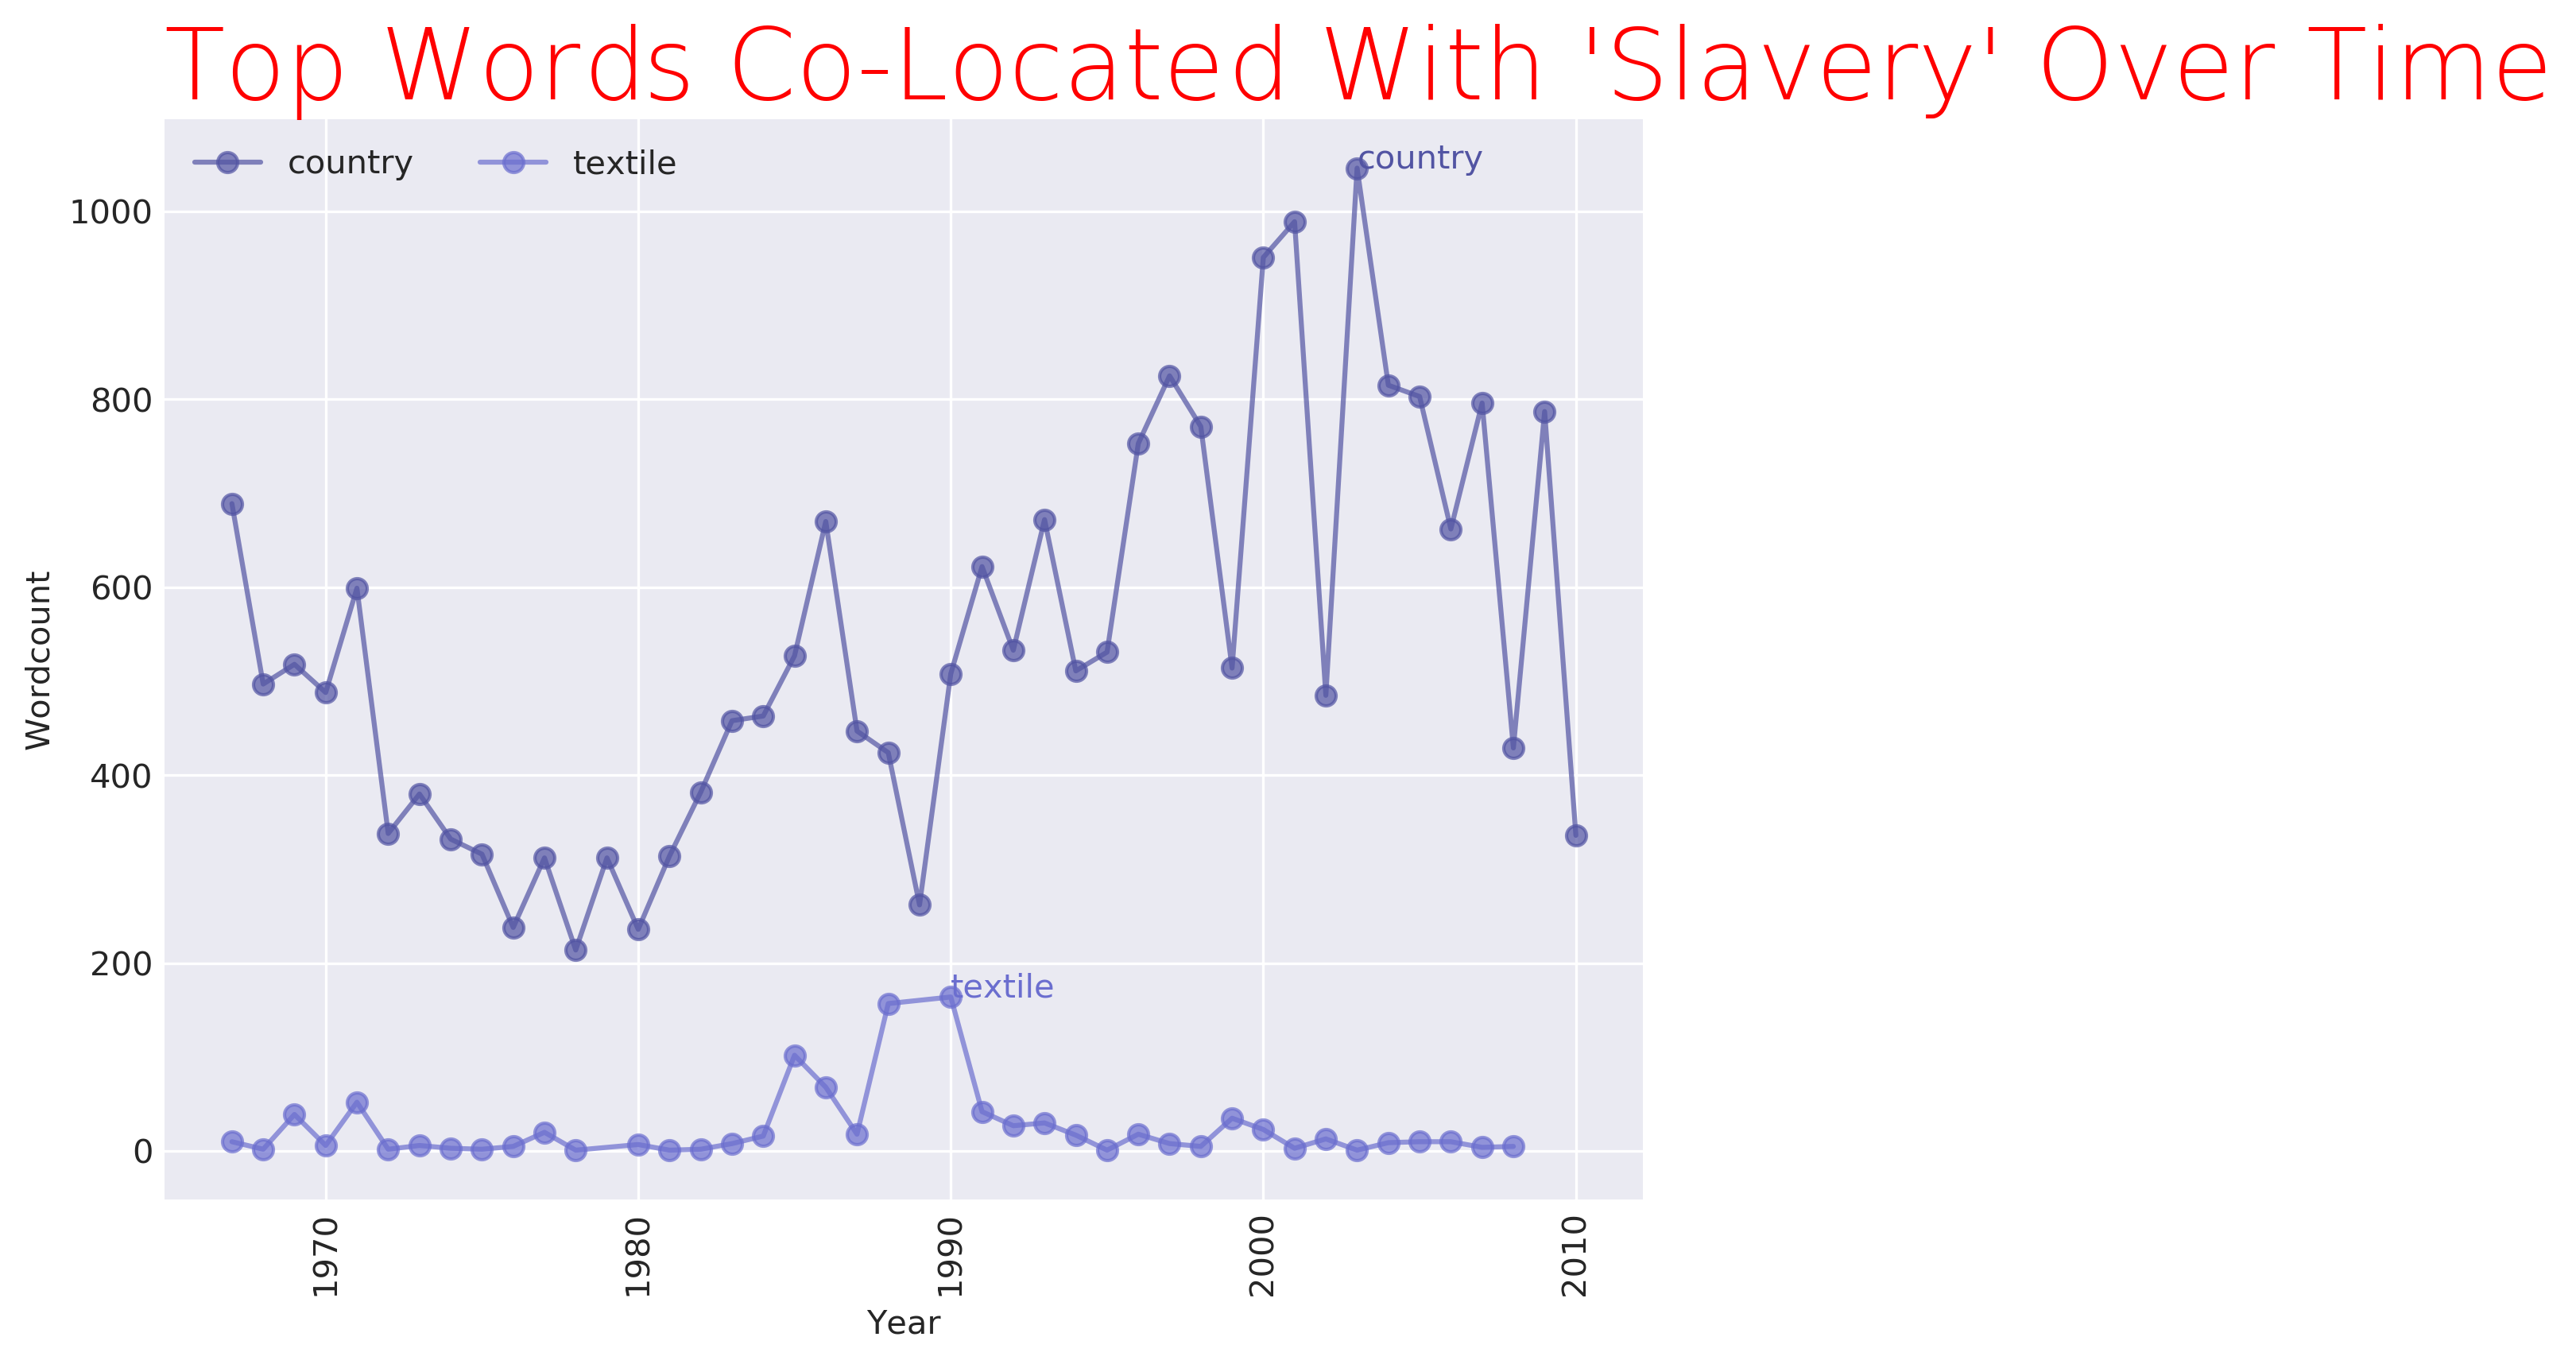

In [67]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import random


%matplotlib inline

figure(figsize=(8, 6), dpi=300)

plt.style.use('seaborn-darkgrid') # this gives us a grid with a dark background.  you can play with this to change the style.
palette = plt.get_cmap('tab20b') # this tells matplotlib what colors to use.  you can play with this to change the colors.

# multiple line plot
num=0

# this is the for loop that creates multiple plots
for word in set(vocab_per_year['vocab']):
    
#  if word not in ['government', 'property', 'negro', 'indie', 'foreign', 'population', 'colony', 'right']: # <---- consider using this line by removing the first hashtag
    
    num+=1 # for each new word, the counter 'num' changes 
    plt.plot(vocab_per_year.loc[vocab_per_year['vocab'] == word, 'year'], # x axis 
             vocab_per_year.loc[vocab_per_year['vocab'] == word, 'count'],  # y axis
             '-o', # make dots with lines
             color=palette(num), 
             alpha=0.7,
             label = word)
    
    # make labels
    y3 = max(vocab_per_year.loc[vocab_per_year['vocab'] == word, 'count']) # label lines at their highest point
    entity_points = vocab_per_year[vocab_per_year['vocab'] == word]
    x3 = random.choice(entity_points[entity_points['count'] == max(entity_points['count'])]['year'].tolist()) # more for finding the highest point
    plt.text(x3, y3, word, color = palette(num), size = 10) # this is the code to supply a label for each line


             
    
# Add legend
plt.legend(loc=2, ncol=2)
plt.xticks(rotation=90)
 
# Add titles
plt.title("Top Words Co-Located With 'Slavery' Over Time", loc='left', fontsize=30, fontweight=0, color='Red')
plt.xlabel("Year")
plt.ylabel("Wordcount")

plt.savefig('slavery-collocates-congress.jpg')
plt.show()

